In [2]:
import numpy as np
import matplotlib.pyplot as plt

### O Metódo de Euler

#### Expansão em Taylor de uma função y


Expansão em Série de Taylor de $y(t)$ centrada em $t_0$ é dada por
$$
y(t) = \sum_{n=0}^{\infty} \frac{y^{(n)}(t_0)}{n!}(t-t_0)^n
$$
##### Expansão de y até a primeira derivada
Seja $h = t_n - t_{n-1}$
$$
y(t_{k+1}) = y(t_k) + y'(t_k)h + \mathcal{O}(h^2)\\
$$
O metódo de Euler explicito é um método recursivo de solução de equações diferenciais ordinárias, e consiste em utilizar a aproximação por Taylor e ignorar o erro $\mathcal{O}(h^2)$, nos dando: <br>
$$
y_{n+1} \approx u_{n+1} = u_n + f(u_n,t_n) \cdot (t_{n+1} - t_n)
$$
Com $y_n = y(t_n)$ a solução analitica no ponto $t_n$ e $u_n$ a aproximação númerica, $f(a,b)$ a derivada de $a$ em $b$

In [133]:
## F: Função derivada da função que queremos encontrar
## t0: tempo inicial
## y0: ponto inicial
## ts: range de tempo
def f_euler(F, y0, ts):
    ys = [y0]
    t = ts[0]
    for tnext in ts:
        ynext = ys[-1] + F(ys[-1],t)*(tnext-t)
        ys.append(ynext)
        t = tnext
    return np.array(ys[:-1])

Runge Kutta segunda ordem

$$
y(t_{i+1}) \approx y(i) + F\left(y_i + K_1, t_i + \frac{t_{i+1} - t{i}}{2}\right) \cdot (t_{i+1} - t{i}),\\
K_1 = \frac{(t_{i+1} - t{i})\cdot F(y_i,t_i)}{2}
$$

In [134]:
def rk2a(F, y0, ts):
    n = len(ts)
    y = np.array( [ y0 ] * n )
    for i in range(n-1):
        h = ts[i+1] - ts[i]
        k1 = h*F(y[i], ts[i] )/ 2.0
        y[i+1] = y[i] + h * F(y[i] + k1, ts[i] + h / 2.0 )
    return y

Testando para a EDO 
$$ \begin{cases} y'(t) = - y(t) + 2\sin(t^2) \\ y(0) = 1.2\end{cases} $$

In [135]:
def F(y,t):
    return -y + 2*np.sin(t**2)

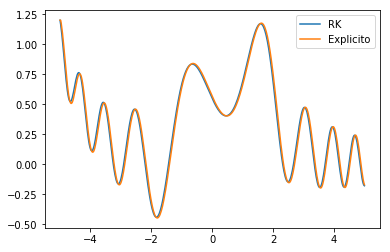

In [136]:
## Definindo o dominio
ts = np.linspace(-5,5,500)
y0 = 1.2
## Criando a lista para Runge-Kutta 2nd order
ys = rk2a(F,y0,ts)

## Criando a lista para Euler Explicito
ys2 = f_euler(F,y0,ts)

#ans = f(y,ts)

plt.plot(ts,ys,label='RK')
plt.plot(ts,ys2,label='Explicito')
plt.legend()
plt.show()

### O metódo de Euler converge - Um pouco de Análise

### Definições:
Seja $\frac{\mathrm{d}y}{\mathrm{d}t} = f(y,t)$<br>
Seja $t \in \mathbb{N}$ o número de 'tempos' no dominio e $t^*$ o tempo final e $\lfloor \cdot \rfloor$ a função `floor`, que retorna a parte inteira.<br>
Seja $h \in \mathbb{R}, h > 0$, o 'tamanho' de cada partição, ou seja $h = t_{n+1} - t_n$ <br>
Podemos então definir $n$, tal que $n$ assume valores no conjunto $\{0, \dots , \lfloor \frac{t^*}{h} \rfloor\}$<br>
Seja $\lVert \cdot \rVert$ uma norma definida no espaço

Seja $y_n$ o valor real (analitico) da função **$y$** no ponto $t_n$, ou seja $y_n = y(t_n)$<br>
Seja $u_n$ o valor númerico aproximado da função $y$ no ponto $t_n$ pelo método de Euler, ou seja $u_{n+1} = u_{n} + f(u_{n},t_{n})\cdot h$<br>
Uma função $f$ é dita Lipschitz se satisfaz a condição de Lipschitz: $\exists M \in \mathbb{R}; \lVert f(x_1) - f(x_2) \rVert \leq M\cdot\lVert x_1 - x_2\rVert$ 

Um metódo é dito convergente se:
$$
\lim_{h\to 0^+} \max_{n=0, \dots , \lfloor \frac{t^*}{h} \rfloor} \lVert u_n - y_n \rVert = 0
$$

Ou seja, sempre que a malha for refinida, a solução númerica em um ponto se aproxima da solução analitica neste ponto

### Teorema: O metódo de Euler converge

#### Prova

Tomemos $f(y,t)$ analitica, ou seja, pode ser representada pela série de Taylor centrada em um ponto $t_0$ e é Lipschitz.<br>
$f(y,t)$ analitica implica $y$ analitica.<br>
Vamos definir $err_n = u_n - y_n$, nosso erro númerico, então queremos provar
$$
\lim_{h\to 0^+} \max_{n=0, \dots , \lfloor \frac{t^*}{h} \rfloor} \lVert err_n \rVert = 0
$$
Expandindo nossa solução $y$ da equação diferencial por Taylor:
$$
y_{n+1} = y_n + hf(y_n,t_n)+\mathcal{O}(h^2) \tag{1}
$$
Como $y$ é analitica, então sua derivada é contínua, logo pelo `Teorema do Valor Extremo`, dado uma vizinhança em torno de $t_n$ o termo $\mathcal{O}(h^2)$ é limitado $\forall h>0$ e $n \leq \lfloor t^*/h \rfloor$ por $M>0, M \in \mathbb{R}$, e pela propriedade arquimediana do corpo do reais $\exists c \in \mathbb{R}, c>0; c\cdot h^2 \geq M$, portanto podemos limitar $\mathcal{O}(h^2)$ por $ch^2, c>0$.<br>
Agora vamos fazer $err_{n+1} = u_{n+1} - y_{n+1}$ usando a expansão em Taylor $y_{n+1}$ e Euler em $u_{n+1}$
$$
\begin{align}
err_{n+1} &= u_{n+1} - y_{n+1}\\
&= u_n + h(f(u_n,t_n)) - y_n - h(f(yn,tn) + \mathcal{O}(h^2)\\
&= \underbrace{u_n - y_n}_{err_n} + h\left(f(u_n,t_n) - f(y_n,t_n)\right) + \mathcal{O}(h^2)\\
&= err_n + h\left(f(u_n,t_n) - f(y_n,t_n)\right) + \mathcal{O}(h^2)\\
\end{align}
$$
Daqui podemos perceber que o erro no passo seguinte depende também do erro anterior já cometido<br>
E segue do fato de que $\mathcal{O}(h^2)$ é limitada, com uma cota superior $ch^2$ e da desigualdade triangular
$$
\lVert err_{n+1} \rVert \leq \lVert err_n\rVert + \lVert h\left(f(u_n,t_n) - f(y_n,t_n)\right)\rVert + \lVert ch^2 \rVert
$$
E pela condição de Lipschitz
$$
\lVert f(u_n,t_n) - f(y_n,t_n) \rVert \leq \lambda\lVert u_n - y_n \rVert = \lambda\lVert err_n \rVert, \lambda > 0
$$
Então temos
$$
\lVert err_{n+1} \rVert \leq \lVert err_n\rVert + \lVert h\left(f(u_n,t_n) - f(y_n,t_n)\right)\rVert + \lVert ch^2 \rVert \leq \lVert err_n\rVert + \lambda h\lVert err_n \rVert + ch^2\\$$
$\therefore$
$$
\lVert err_{n+1} \rVert \leq  (1+h\lambda)\lVert err_n \rVert + ch^2 \tag{2}
$$

---
Agora vamos propor:
$$
\lVert err_n \rVert \leq \frac{c}{\lambda}h[(1+h\lambda)^n - 1]
$$
#### Demonstração: Indução em n
Para $n = 0$
$$
\lVert err_0 \rVert \leq \frac{c}{\lambda}h[(1+h\lambda)^0 - 1] = \frac{c}{\lambda}h[1 - 1] = 0\\
err_0 = u_0 - y_0 = 0, \text{pois é a condição inicial}
$$
Temos portanto nossa hipotese de indução, vale para $n=k$, vamos para o passo indutivo: $n = k+1$. Da equação 2, temos:
$$
\lVert err_{k+1}\rVert \leq (1+h\lambda)\lVert err_k \rVert + ch^2
$$
E pela hipotese de indução
$$
\lVert err_k \rVert\leq \frac{c}{\lambda}h[(1+h\lambda)^k - 1]
$$
Logo
$$
\lVert err_{k+1} \rVert \leq (1+h\lambda)\frac{c}{\lambda}h[(1+h\lambda)^k - 1] + ch^2
$$
Desenvolvendo o termo da direita:
$$
\begin{align}
(1+h\lambda)\frac{c}{\lambda}h[(1+h\lambda)^k - 1] + ch^2 &= \frac{c}{\lambda}h[(1+h\lambda)^{k+1} - (1+h\lambda)] +ch^2\\
&= \frac{c}{\lambda}h(1+h\lambda)^{k+1} - \frac{c}{\lambda}h(1+h\lambda) +ch^2\\
&= \frac{c}{\lambda}h(1+h\lambda)^{k+1} - \frac{c}{\lambda}h - \frac{c}{\lambda}h^2\lambda + ch^2\\
&= \frac{c}{\lambda}h(1+h\lambda)^{k+1} - \frac{c}{\lambda}h\\
&= \frac{c}{\lambda}h[(1+h\lambda)^{k+1} - 1]
\end{align}
$$
Portanto
$$
\lVert err_{k+1} \rVert \leq \frac{c}{\lambda}h[(1+h\lambda)^{k+1} - 1]
$$
E o passo indutivo vale. Logo pelo principio de indução finita temos:
$$
\lVert err_n \rVert \leq \frac{c}{\lambda}h[(1+h\lambda)^n - 1] \tag{3}
$$

---
Como $h\lambda >0$, então temos $(1+h\lambda) < e^{h\lambda}$ e portanto $(1+h\lambda)^n < e^{nh\lambda}$, e n assume valor máximo em $n = \lfloor t^*/h \rfloor $, portanto:
$$(1+h\lambda)^n < e^{\lfloor t^*/h \rfloor h\lambda} \leq e^{t^*\lambda}$$
Substituindo na inequação 3 para $err_n$, teremos:
$$
\lVert err_n \rVert \leq \frac{c}{\lambda}h[e^{t^*\lambda} - 1]
$$
Passando o limite $h\to 0$, teremos:
$$
\lim_{h\to 0}\lVert err_n \rVert \leq \frac{c}{\lambda}h[e^{t^*\lambda} - 1] = 0\\
\therefore
\lim_{h\to 0}\lVert err_n \rVert = 0
$$
Portanto o Metódo de Euler converge para toda função Lipschitz. Q.E.D.


### Visualizando o teorema

Vamos plotar a solução da equação diferencial $y' = sin(t^2) - y$ com um refinamento da malha cada vez melhor e visualizar a convergência do metódo<br>
Plotaremos também um gráfico com a evolução do erro relativo entre a solução de malha mais fina e todas as soluções anteriores

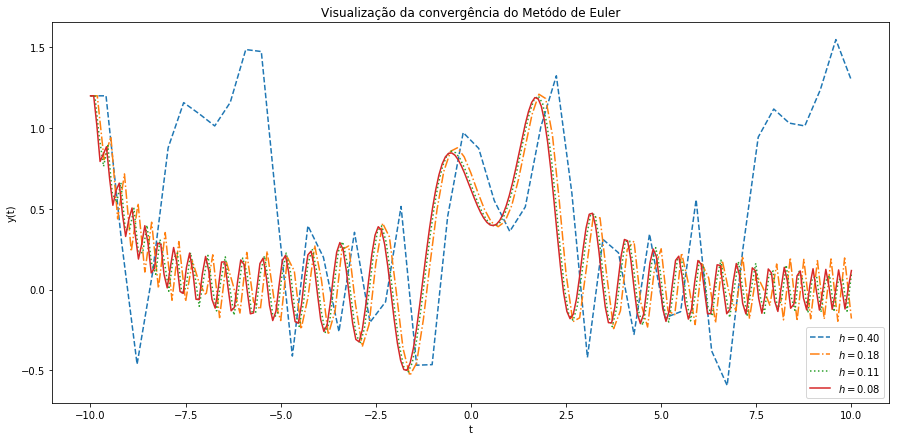

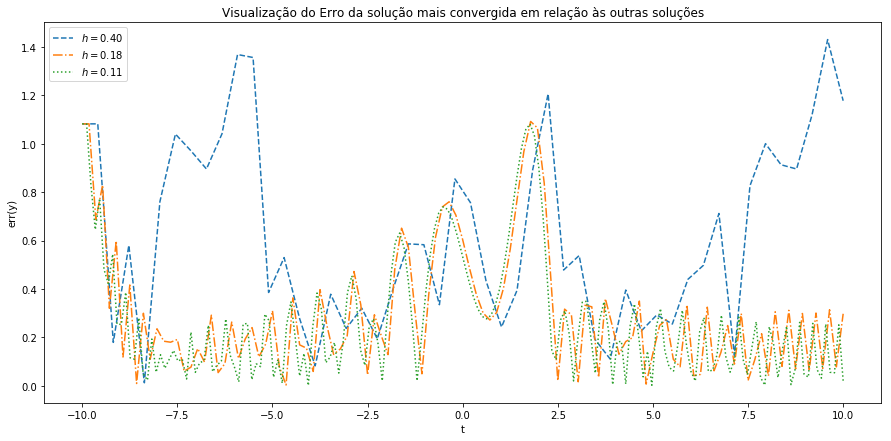

In [211]:
## Equação Diferencial
def F(y,t):
    return -y + 2*np.sin(t**2) 

# Criação dos dominios com vários h diferentes
ts = np.array([np.linspace(-10,10,i) for i in np.arange(50,300,63)])

# Condição inicial
y0 = 1.2
# Preparação da listas para plotagem
ys_e = np.array([f_euler(F,y0,i) for i in ts ])
# Estilo das curvas
lstyle = ['--','-.',':','-']

# Plot do gráfico de solução
plt.figure(figsize=(15,7))
for i in range(len(ts)):
    plt.plot(ts[i],ys_e[i], ls = lstyle[i], label='$h = '+ str("{0:.2f}".format(20.0/len(ts[i])) +'$'))
plt.title('Visualização da convergência do Metódo de Euler')
plt.xlabel('t')
plt.ylabel('y(t)')
plt.legend()
plt.show()

## Criando os arrays de erro
hs = [0.4,0.18,0.11]
ans = [[],[],[]]
for i in range(len(ys_e[:-1])):
    n = np.floor(hs[i]/0.08)
    for j in range(len(ys_e[i])):
        try: ans[i].append(ys_e[-1][n*j])
        except: ans[i].append(ys_e[-1][-1])
for i in range(len(ans)): 
    ans[i] = np.array(ans[i])
            
err = np.array([abs(j - i) for i,j in zip(ys_e,ans)])
plt.figure(figsize=(15,7))
for i in range(len(ts)-1):
    plt.plot(ts[i],err[i], ls = lstyle[i], label='$h = '+ str("{0:.2f}".format(20.0/len(ts[i])) +'$'))
plt.title('Visualização do Erro da solução mais convergida em relação às outras soluções')
plt.xlabel('t')
plt.ylabel('err(y)')
plt.legend()
plt.show()

In [200]:
err

array([array([ 0.00000000e+00,  3.56064561e-01,  3.63376284e-01,  3.44697445e+00,
        1.95817107e-01,  5.24088570e+00,  7.54585558e+00,  1.00575219e+01,
        6.89308716e+01, -1.14057562e+01, -1.09168740e+01,  1.83829035e+01,
        1.80868375e+00, -9.79700244e-01,  1.82244455e+00, -3.37099023e+00,
        3.17507088e+00, -2.41346238e+00,  1.52068738e+00, -5.93349166e-01,
       -2.13541992e+00,  3.09485007e+00,  1.59747683e+00,  4.37323871e-01,
        7.10448143e-01,  1.18501980e+00,  6.60704689e-02,  6.14940490e-01,
        5.67002941e-01,  8.51860886e-01, -8.34384560e+00,  5.64021961e-01,
        8.08891588e+00,  5.24529986e+00,  1.75645878e+01,  2.67052046e+00,
       -2.74773913e+00,  2.99488418e+00,  1.76284751e+00,  2.26235059e+02,
       -2.11201748e+00, -2.94631488e+00, -2.65457079e+00, -7.97531226e+00,
       -1.34509880e+01,  4.07209808e+01,  7.11071250e+00,  1.65793558e+02,
        1.21451096e+01,  9.99942701e+00]),
       array([ 0.00000000e+00,  1.83366372e-01,  3

In [180]:
a = [1,2,3,4,5,6,7,8]
b = []
a

[1, 2, 3, 4, 5, 6, 7, 8]

In [181]:
for i in range(len(a)):
    try: b.append(a[2*i])
    except: b.append(a[-1])

In [182]:
b

[1, 3, 5, 7, 8, 8, 8, 8]

##### Teorema: O metódo de Euler converge

###### Prova

Tomemos $f(y,t)$ analitica, ou seja, pode ser representada pela série de Taylor centrada em um ponto $t_0$ e é Lipschitz continua.<br>
$f(y,t)$ analitica implica $y$ analitica.<br>
Vamos definir $err_n = u_n - y_n$, nosso erro númerico, então queremos provar
$$
\lim_{h\to 0^+} \max_{n=0, \dots , \lfloor \frac{t^*}{h} \rfloor} \lVert err_n \rVert = 0
$$
Expandindo nossa solução $y$ da equação diferencial por Taylor:
$$
y_{n+1} = y_n + hf(y_n,t_n)+\mathcal{O}(h^2)
$$
Como $y$ é analitica, então sua derivada é contínua, logo pelo `Teorema do Valor Extremo`, dado uma vizinhança em torno de $t_n$ o termo $\mathcal{O}(h^2)$ é limitado $\forall h>0$ e $n \leq \lfloor t^*/h \rfloor$ por $M>0, M \in \mathbb{R}$, e pela propriedade arquimediana do corpo do reais $\exists c \in \mathbb{R}, c>0; c\cdot h^2 \geq M$, portanto podemos limitar $\mathcal{O}(h^2)$ por $ch^2, c>0$.<br>
Agora vamos fazer $err_{n+1} = u_{n+1} - y_{n+1}$ usando a expansão em Taylor e Euler em $u_n$
$$
\begin{align}
err_{n+1} &= u_{n+1} - y_{n+1}\\
&= u_n + h(f(u_n,t_n)) - y_n - h(f(yn,tn) + \mathcal{O}(h^2)\\
&= \underbrace{u_n - y_n}_{err_n} + h\left(f(u_n,t_n) - f(y_n,t_n)\right) + \mathcal{O}(h^2)\\
&= err_n + h\left(f(u_n,t_n) - f(y_n,t_n)\right) + \mathcal{O}(h^2)\\
\end{align}
$$
Daqui podemos perceber que o erro no passo seguinte depende também do erro anterior já cometido<br>
E segue do limite superior para $\mathcal{O}(h^2)$ e da desigualdade triangular
$$
\lVert err_{n+1} \rVert \leq \lVert err_n\rVert + \lVert h\left(f(u_n,t_n) - f(y_n,t_n)\right)\rVert + \lVert ch^2 \rVert
$$
E pela condição de Lipschitz
$$
\lVert f(u_n,t_n) - f(y_n,t_n) \rVert \leq \lambda\lVert u_n - y_n \rVert = \lambda\lVert err_n \rVert, \lambda > 0
$$
Então temos
$$
\lVert err_{n+1} \rVert \leq \lVert err_n\rVert + \lVert h\left(f(u_n,t_n) - f(y_n,t_n)\right)\rVert + \lVert ch^2 \rVert \leq \lVert err_n\rVert + \lambda h\lVert err_n \rVert + ch^2\\
\therefore
\lVert err_{n+1} \rVert \leq \lVert err_n\rVert + \lVert h\left(f(u_n,t_n) - f(y_n,t_n)\right)\rVert + \lVert ch^2 \rVert \leq  (1+h\lambda)\lVert err_n \rVert + ch^2
$$


Assumiremos (provar mais tarde)
$$
\lVert err_n \rVert \leq \frac{c}{\lambda}h[(1+h\lambda)^n - 1]
$$
Como $h\lambda >0$, então temos $(1+h\lambda) < e^{h\lambda}$ e portanto $(1+h\lambda)^n < e^{nh\lambda}$, e n assume valor máximo em $n = \lfloor t^*/h \rfloor $, portanto: $(1+h\lambda)^n < e^{\lfloor t^*/h \rfloor h\lambda} = e^{t^*\lambda}$<br>
Substituindo na inequação anterior para $err_n$, teremos:
$$
\lVert err_n \rVert \leq \frac{c}{\lambda}h[e^{t^*\lambda} - 1]
$$
Passando o limite $h\to 0$, teremos:
$$
\lim_{h\to 0}\lVert err_n \rVert \leq \frac{c}{\lambda}h[e^{t^*\lambda} - 1] = 0\\
\therefore
\lim_{h\to 0}\lVert err_n \rVert = 0
$$
O Metódo de Euler converger. Q.E.D.
